In [196]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt
sb.set()


In [198]:
sleepdata = pd.read_csv("sleepdisorder-filtered.csv")
Dsteps = pd.DataFrame(sleepdata["Daily Steps"])
Qsleep = pd.DataFrame(sleepdata["Quality of Sleep"])
Sduration = pd.DataFrame(sleepdata["Sleep Duration"])
age = pd.DataFrame(sleepdata["Age"])
Hrate = pd.DataFrame(sleepdata["Heart Rate"])

## Model Selection Rationale: 
Linear Regression was chosen for its simplicity and interpretability. 
Random Forest Regression was selected for its ability to model nonlinear relationships and interactions between features. OLS Regression was included for its statistical inferences about the significance of predictors.

Model Implementation: The dataset was split into an 80:20 ratio for training and testing. Each model was trained on the same training set, and their performances were evaluated on the test set using metrics such as R² and RMSE (Root Mean Square Error).

## Model 1: Linear Regression

Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Dsteps_Train, Dsteps_Test, Qsleep_Train, Qsleep_Test, Sduration_Train, Sduration_Test, age_Train, age_Test, Hrate_Train, Hrate_Test = train_test_split(Dsteps, Qsleep, Sduration, age, Hrate, test_size = 0.20)


## 1. Relationship between the number of Daily Steps and the Quality Of Sleep.



The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

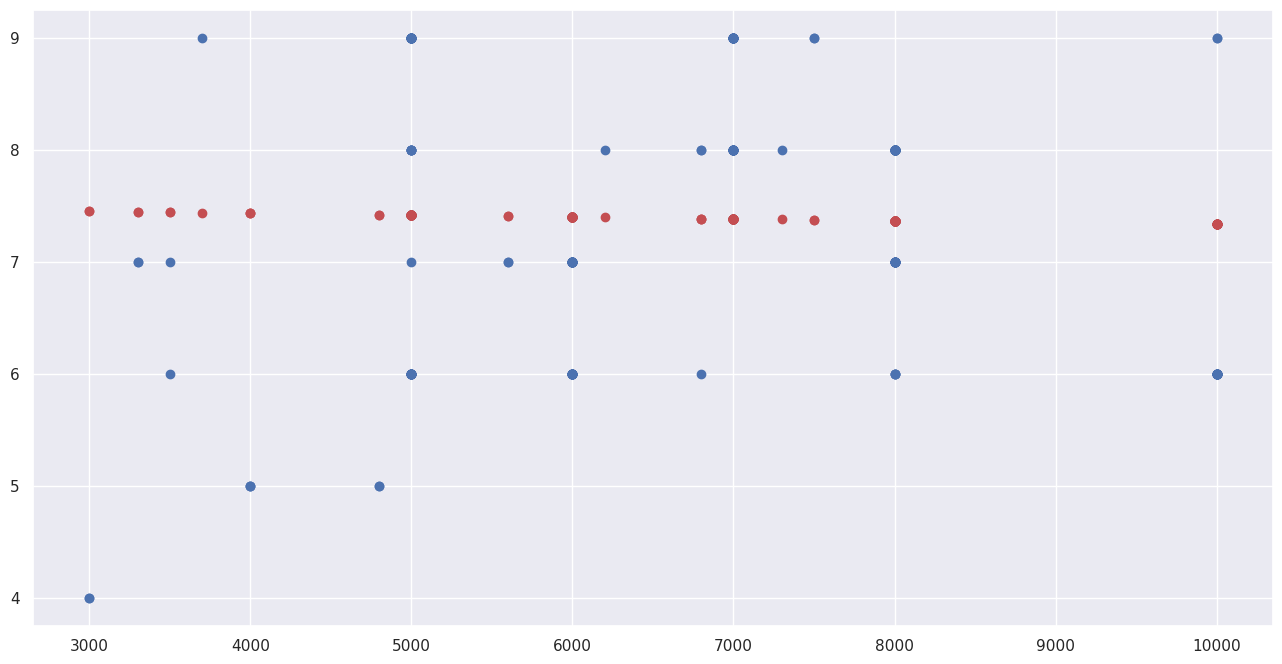

In [205]:
linreg = LinearRegression()       
linreg.fit(Dsteps_Train, Qsleep_Train)      

Qsleep_Train_Pred=linreg.predict(Dsteps_Train)
Qsleep_Test_Pred=linreg.predict(Dsteps_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Dsteps_Train,Qsleep_Train)
plt.scatter(Dsteps_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [207]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error( Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0005015485757133842
Mean Squared Error (MSE) 	: 1.3889496779608697

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.047628476226150074
Mean Squared Error (MSE) 	: 1.350093892755285



#### Conclusion: 
The R² values here suggest that Daily Steps do not explain the variance in sleep quality for either dataset. A negative R² for the test dataset implies that the model fits worse than a horizontal line. The MSE values are moderate, but given the R², they do not contribute to a reliable model.

## 2. Relationship between the Sleep Duration and the Quality Of Sleep.



The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

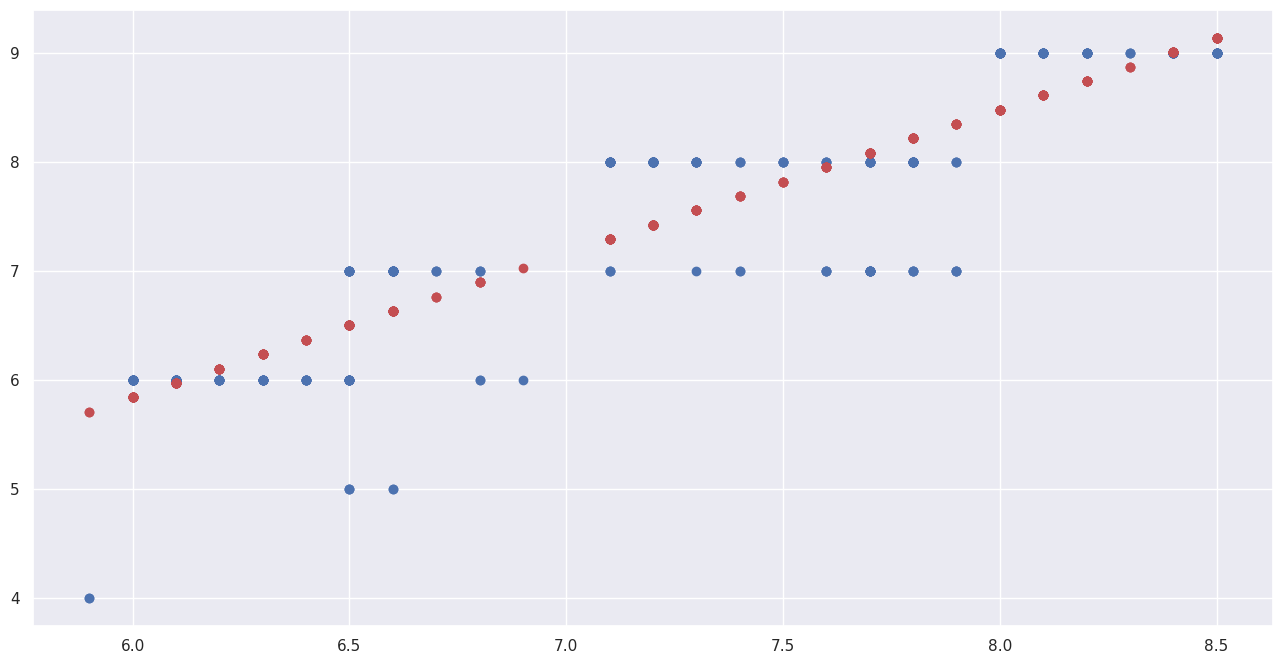

In [212]:
linreg.fit(Sduration_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Sduration_Train)
Qsleep_Test_Pred=linreg.predict(Sduration_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Sduration_Train,Qsleep_Train)
plt.scatter(Sduration_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [214]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7953934296979958
Mean Squared Error (MSE) 	: 0.2843308356553011

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.697760977407557
Mean Squared Error (MSE) 	: 0.3894997776542859



#### Conclusion: 

Sleep Duration has a high R² value, especially in the test dataset, indicating a strong relationship with the quality of sleep. Lower MSE for both datasets also points towards a better model fit. This indicator seems to be a good predictor of sleep quality.

## 3. Relationship between the Age and the Quality Of Sleep.



The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

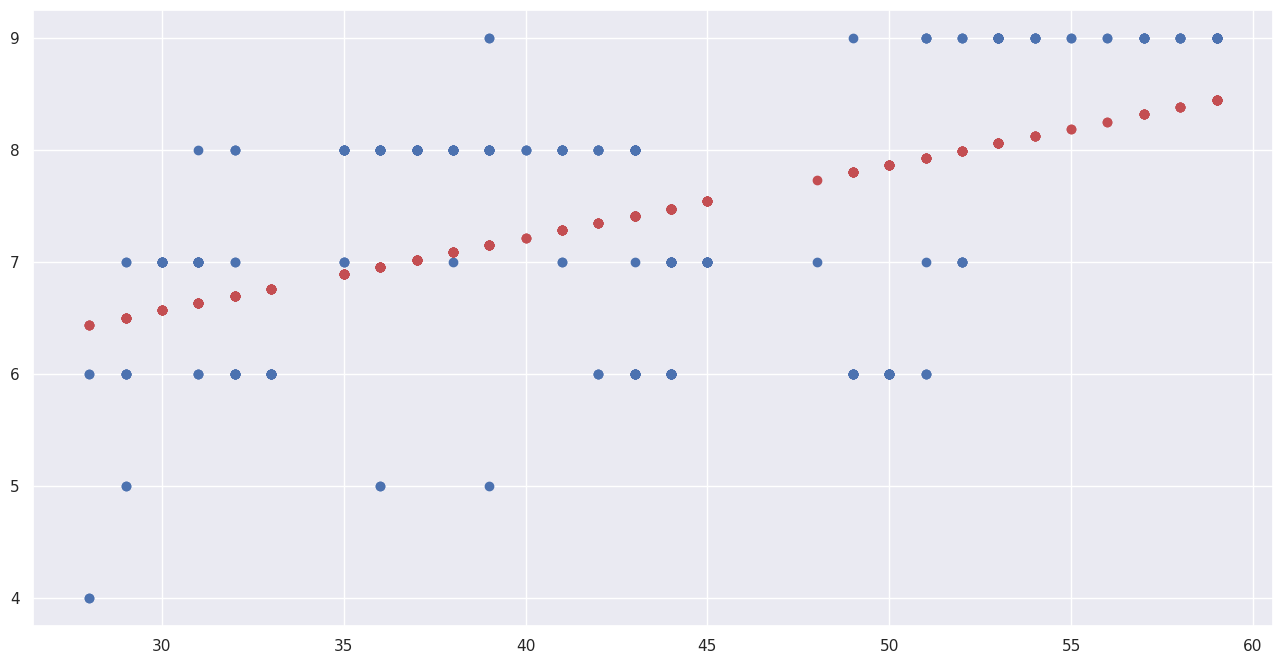

In [218]:
linreg.fit(age_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(age_Train)
Qsleep_Test_Pred=linreg.predict(age_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(age_Train,Qsleep_Train)
plt.scatter(age_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [219]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2279814260091637
Mean Squared Error (MSE) 	: 1.0728330276013536

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.14764467580674823
Mean Squared Error (MSE) 	: 1.0984425717369937



#### Conclusion: 

Age has a low to moderate R² value, which means it only partially explains the variance in sleep quality. The high MSE values indicate significant error margins, which reduces the model’s predictive accuracy.

## 4. Relationship between the Heart Rate and the Quality Of Sleep.



The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

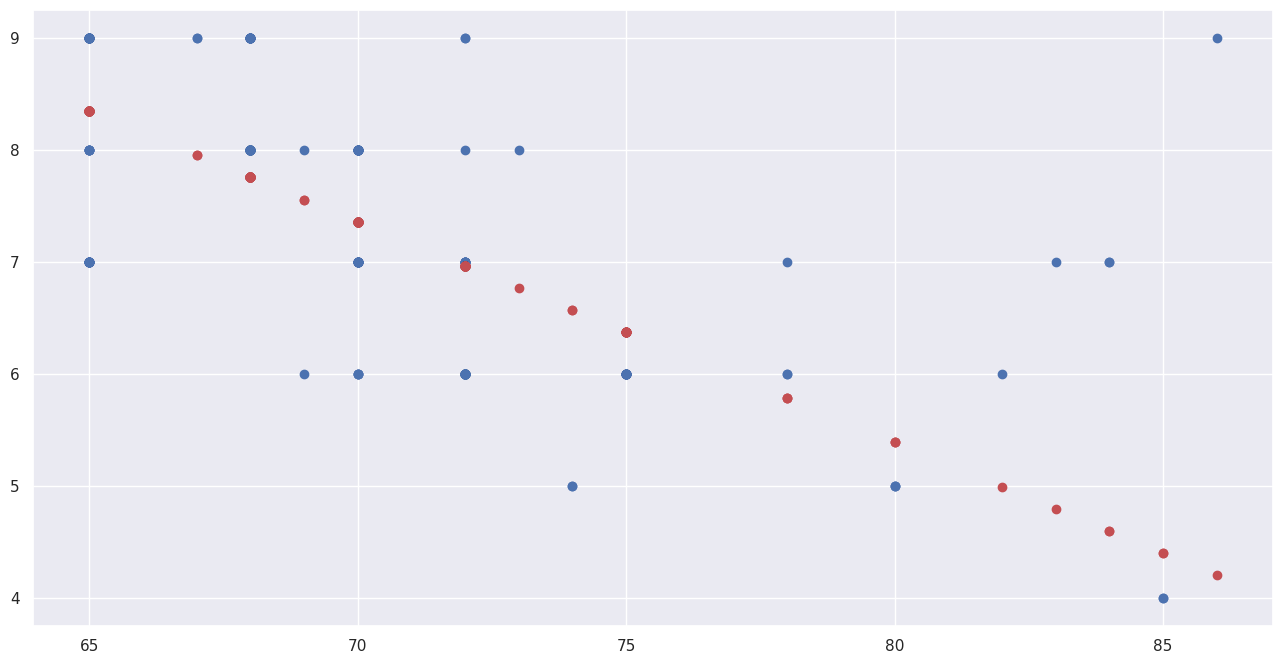

In [224]:
linreg.fit(Hrate_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Hrate_Train)
Qsleep_Test_Pred=linreg.predict(Hrate_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Hrate_Train,Qsleep_Train)
plt.scatter(Hrate_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [225]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Hrate_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Hrate_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4372469763549317
Mean Squared Error (MSE) 	: 0.7820278559206284

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2865808565367347
Mean Squared Error (MSE) 	: 0.9193935163294855



#### Conclusion: 

Heart Rate shows moderate explanatory power for the variance in sleep quality, more so in the test dataset. However, the MSE is somewhat high, so while there might be some relationship, it's not as strong as sleep duration.

## Comparisons
When using these indicators to predict sleep quality, one should focus on sleep duration as the primary predictor. The other indicators might provide additional insights but should be considered supplementary. It is also essential to note that other untested factors might influence sleep quality, and these results should be viewed within the larger context of an individual's health and lifestyle.

# Model 2: Random Forest Regression

Mean Squared Error: 0.022309459459459446


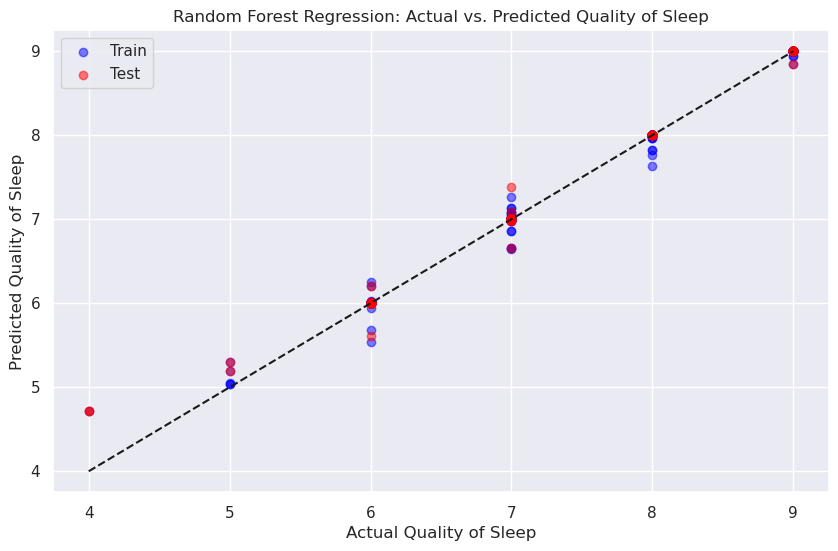

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming sleep_data is your DataFrame with all the data
# and 'Quality of Sleep' is the target variable
X = sleepdata[['Sleep Duration', 'Heart Rate', 'Daily Steps', 'Age']]
y = sleepdata['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Train', color='blue', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Test', color='red', alpha=0.5)
plt.title('Random Forest Regression: Actual vs. Predicted Quality of Sleep')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()


#### Conclusion: 

The Random Forest Regression compares the Actual Quality of Sleep to the predicted quality of sleep, where Blue dots represent the training data predictions, and red dots represent the test data predictions.
The dashed line represents the line of perfect prediction, where the predicted values match the actual values.
The blue and red dots are generally close to the line of perfect prediction, suggesting that the model has good predictive performance.


# Model 3 OLS Linear Regression

### Test 1 - "Sleep Duration", "Age", "Heart Rate", "Daily Steps"

In [236]:
import statsmodels.api as sm
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age", "Heart Rate", "Daily Steps"]]
X = sm.add_constant(X)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now define an OLS linear regression model and fit it to the training split:

In [155]:
model = sm.OLS(y_train,X_train)
results = model.fit()


In [156]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     446.3
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          1.51e-122
Time:                        16:41:54   Log-Likelihood:                -169.05
No. Observations:                 295   AIC:                             348.1
Df Residuals:                     290   BIC:                             366.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1206      0.686      4.546      0.000       1.770       4.472
Sleep Duration     1.0602      0.038     27.622      0.000       0.985       1.136
Age                0.0241      0.003      7.772      0.000       0.018       0.030
Heart Rate        -0.0632      0.007     -8.896      0.000      -0.077      -0.049
Daily Steps     9.448e-06   1.56e-05      0.606      0.545   -2.13e-05    4.01e-05
==============================================================================
Omnibus:                        1.667   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.469
Skew:                           0.042   Prob(JB):                        0.480
Kurtosis:                       3.335   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summary

A first warning bell is suggested in the notes, where a large condition number of  1.93e+05 indicates a strong multicollinerity among our predictors. This can be justified by the fact that we use all the available predictors in our model. We can try to remove one or more predictors to reduce multicollinerity.

From our data, p-values of Sleep Duration, Age and Heart Rate are 0.00, which are statistically significant,(typically, a p-value less than 0.05 is considered significant). 
Daily steps however, has p-value of 0.235, which is not statistically significant at the 0.05 level.

We have high R-squared and Adjusted R-squared values, which somehow indicate we are on the right track to predict our factor with a good approximation.

### Test 2 - "Sleep Duration", "Age", "Heart Rate"

In [57]:
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age", "Heart Rate"]]
X = sm.add_constant(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [63]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     596.2
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          6.83e-124
Time:                        16:05:05   Log-Likelihood:                -169.24
No. Observations:                 295   AIC:                             346.5
Df Residuals:                     291   BIC:                             361.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2122      0.669      4.802      0.000       1.896       4.529
Sleep Duration     1.0569      0.038     27.852      0.000       0.982       1.132
Age                0.0242      0.003      7.833      0.000       0.018       0.030
Heart Rate        -0.0633      0.007     -8.923      0.000      -0.077      -0.049
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.016
Skew:                           0.023   Prob(JB):                        0.602
Kurtosis:                       3.284   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary

Although the p-values of the regression coefficients are all below the significance threshold α = 0.05, there is still a strong multicollinearty among the predictors. Let's try without Heart Rate so to keep Sleep Duration and Age, the most relevant factors from the previous exploratory and statistical analysis

### Test 3 - "Sleep Duration", "Age"

In [118]:
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age"]]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     569.0
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           9.49e-95
Time:                        16:30:52   Log-Likelihood:                -179.37
No. Observations:                 258   AIC:                             364.7
Df Residuals:                     255   BIC:                             375.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4084      0.292     -8.241      0.000      -2.984      -1.833
Sleep Duration     1.2183      0.040     30.119      0.000       1.139       1.298
Age                0.0246      0.004      6.584      0.000       0.017       0.032
==============================================================================
Omnibus:                        6.000   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.883
Skew:                          -0.368   Prob(JB):                       0.0528
Kurtosis:                       3.069   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the model seems to fit correctly.

Now, let's use the MAE (Mean Absolute Error) to assess the accuracy of the training model. We can benchmark it against the average of the target variable y, since we don't want our model to perform worse than that.

Let's print out the MAE of the naïve benchmark model (the mean of the target variable) and that of the training model:

In [171]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

### Error Distribution for Train data

In [177]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 1.01
Training MAE: 0.34


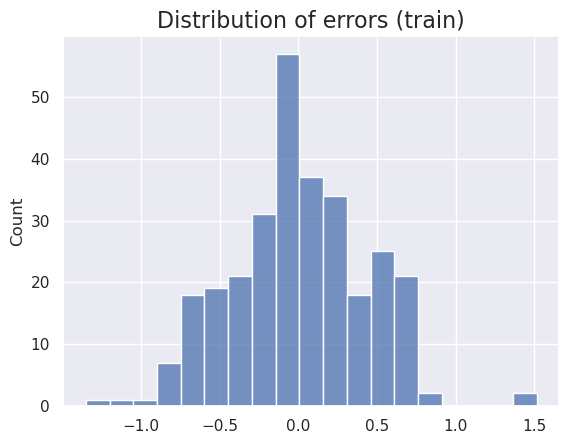

In [179]:
sns.histplot(y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

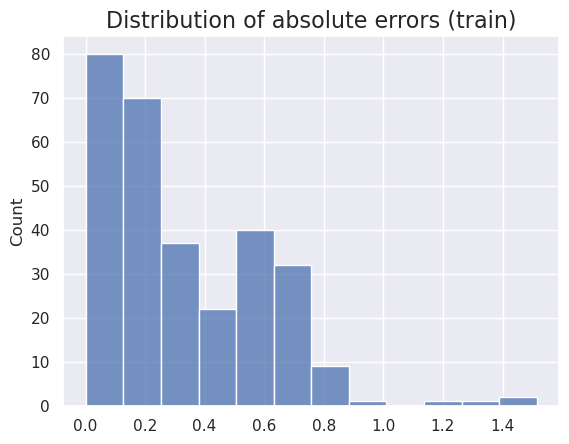

In [181]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution of absolute errors (train)", size=16)
plt.show()

So far, we have trained a regression model on the training dataset. The next step is to test its accuracy on the test dataset. To do this, we use the predictors from the test set X_test to make predictions with the model we just trained, and then compare these to the observed responses in y_test.

Finally, we can print out the MAE of the naïve benchmark model (the mean of the target variable) and that of the testing model:

### Error Distribution for Train data

In [189]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 1.03
Testing MAE: 0.39


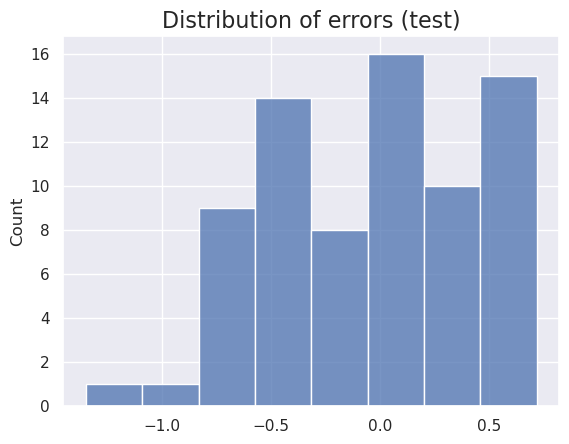

In [191]:
sns.histplot(y_test - pred_test).set_title("Distribution of errors (test)", size=16)
plt.show()

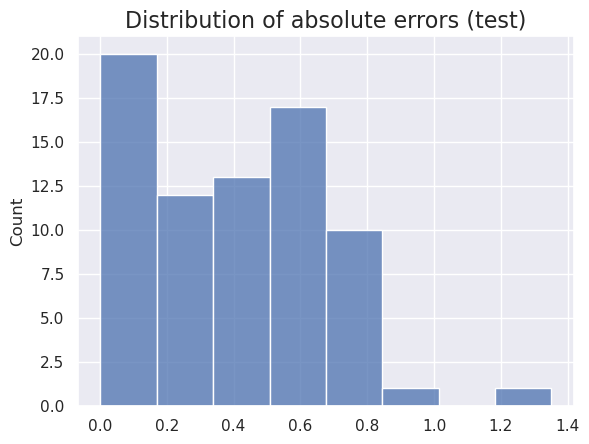

In [193]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution of absolute errors (test)", size=16)
plt.show()

Comparing the training and testing MAE results, we can conclude that the model doesn't overfit the data. In fact, the Mean Absolute Errors between the two models are quite similar. In case of overfitting, we would have observed a larger and more evident discrepancy between the training and testing performance, with larger errors specifically in the testing predictions.

## In Conclusion

Even though Heart Rate was a better indicator than Age based on our previous interpretation for Linear Regression (moderate R² in Heart Rate vs. low R² in Age), the higher condition number in the Sleep Duration and Heart Rate model suggests that it might be more sensitive to multicollinearity or other numerical issues. It's possible that Sleep Duration and Heart Rate are more linearly dependent or have a relationship that causes fluctuations in the regression coefficients when small variations in the data occur.

Multicollinearity can occur when the independent variables in the model are highly correlated with each other. This does not necessarily mean that Heart Rate is a poor predictor, but rather that when combined with Sleep Duration in a regression model, the predictors may not be independent of each other, which could inflate the variance of the coefficient estimates and make the model more sensitive to small changes in the data.

The lower condition number in the model with Age may suggest that Sleep Duration and Age are less collinear, and thus the model might be more stable and less sensitive to small data changes, even though the individual predictive power of Age on sleep quality may not be as strong as that of Heart Rate.

## Overall Strength Ranking Based on Both Models:
1. #### Sleep Duration (most predictive)
2. #### Heart Rate
3. #### Age
4. #### Daily Steps (least predictive)

#### Sleep Duration stands out as the most significant predictor of sleep quality, with consistent results across both models. Heart Rate, despite a higher condition number when paired with Sleep Duration, is still a meaningful predictor, albeit with a negative relationship. Age provides some predictive power, but not as strongly as Sleep Duration or Heart Rate. Daily Steps did not show significant predictive capability in the initial analysis.